<a href="https://colab.research.google.com/github/SrinijaB-05/SafeStreet-1/blob/main/Bounding_boxes_without_training_of_less_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 984.0/984.0 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/drive/MyDrive/Dataset1/images/potholes294.png: 480x640 18 potholes, 35.1ms
Speed: 13.2ms preprocess, 35.1ms inference, 323.6ms postprocess per image at shape (1, 3, 480, 640)


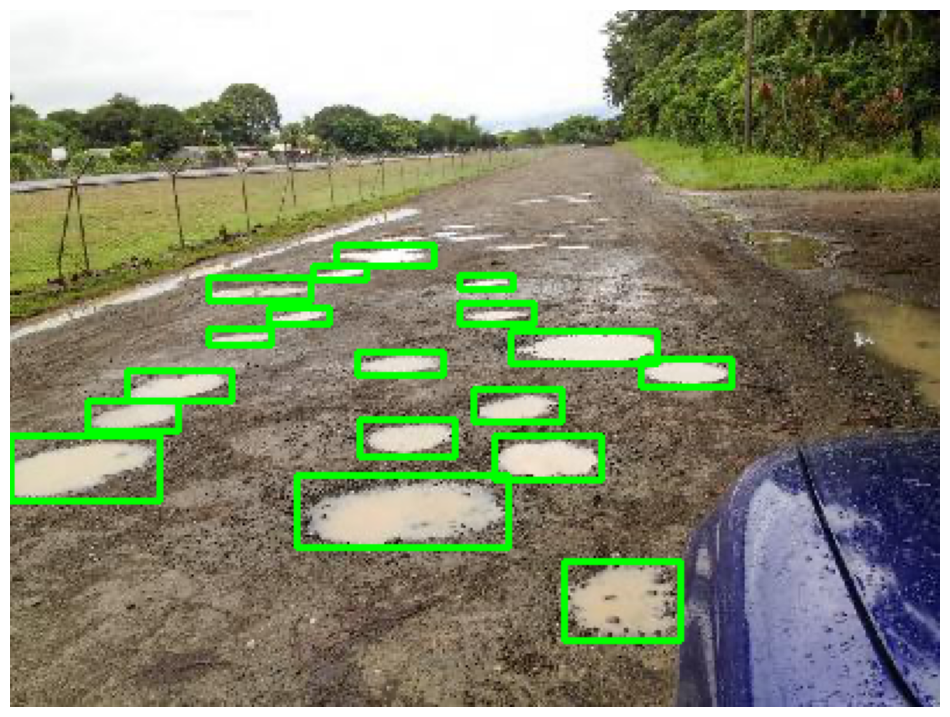

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load trained model from Google Drive
model = YOLO("/content/drive/MyDrive/trained_models/road_damage_best.pt")

# Image path
img_path = "/content/drive/MyDrive/Dataset1/images/potholes294.png"  # Change as needed

# Predict
results = model.predict(source=img_path, conf=0.25)[0]

# Load image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw only green boxes
for box in results.boxes:
    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box with thickness 2

# Show result
plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

Saving 56.jpg to 56.jpg

image 1/1 /content/56.jpg: 640x640 1 pothole, 9.4ms
Speed: 2.5ms preprocess, 9.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


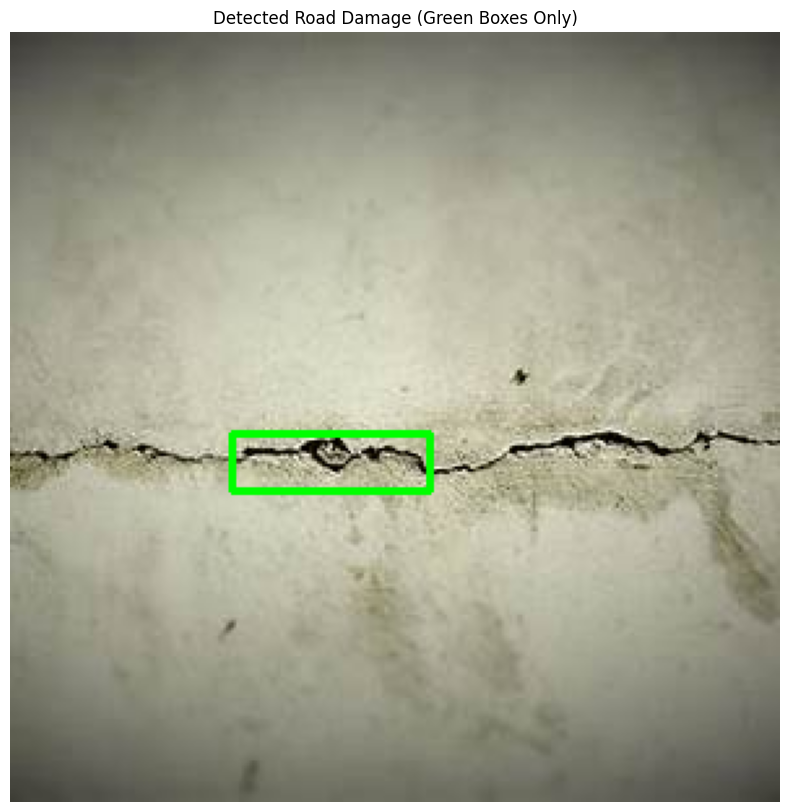

In [ ]:
from google.colab import files
uploaded = files.upload()

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load trained model
#model = YOLO("runs/detect/train/weights/best.pt")  # Adjust path if needed
model = YOLO("/content/drive/MyDrive/trained_models/road_damage_best.pt")

# Use the uploaded image path (run this after you've uploaded using files.upload)
uploaded_img_path = list(uploaded.keys())[0]

# Run detection
results = model.predict(source=uploaded_img_path, conf=0.25)[0]

# Load and convert the image
img = cv2.imread(uploaded_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw only green rectangles around each detected object
for box in results.boxes:
    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box

# Show the result
plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.title("Detected Road Damage (Green Boxes Only)")
plt.show()